In [23]:
import os
def createFolderStructure():
    os.mkdir('images')
    os.mkdir('./images/Zipped')
#createFolderStructure()


In [24]:
import urllib.request
def downloadImagesZips():
    # URLs for the zip files
    links = [
        'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
        'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
        'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
        'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
        'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
        'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
        'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
        'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
        'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
        'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
        'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
        'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
    ]
    for idx, link in enumerate(links):
        fn = 'images/Zipped/images_%02d.tar.gz' % (idx+1)
        print('downloading '+fn+'...')
        urllib.request.urlretrieve(link, fn)  # download the zip file
    print("Download complete. Please check the checksums")
#downloadImagesZips()


In [25]:
import tarfile
def unzipFiles():
    for file in os.listdir('./images/Zipped'):
        if(file.endswith('.gz')):
            tar = tarfile.open('./images/Zipped/'+file, "r:gz")
            tar.extractall('images')
            tar.close()
            #os.remove('images/Zipped/'+file)
    print('Done!')
#unzipFiles()


In [26]:
import cv2
def resizeFiles():
    dim = (256,256)
    for file in os.listdir('images/images'):
        if file.endswith('.png'):
            img = cv2.imread(f'images/images/{file}')
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            cv2.imwrite(f'myApp/website/static/assets/images/{file}', resized)
    print('Done')
#resizeFiles()


In [27]:
import pandas as pd
import glob
import os
all_xray_df = pd.read_csv('./Documentation/Data_Entry_2017_v2020.csv')
all_image_paths = {os.path.basename(x): x for x in
                   glob.glob(os.path.join('.', 'images', 'images', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3)


Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
16880,00004528_000.png,Nodule,0,4528,49,M,PA,2021,2021,0.194311,0.194311,.\images\images\00004528_000.png
60357,00014904_001.png,No Finding,3,14904,41,F,PA,2021,2021,0.194311,0.194311,.\images\images\00014904_001.png
109503,00029806_000.png,No Finding,0,29806,44,F,PA,2021,2021,0.194311,0.194311,.\images\images\00029806_000.png


In [28]:
x = all_xray_df['Finding Labels'].str.contains('\|').sum()
print("Number of images with multiple labels ", x)
labels = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation', 'No Finding']
for label in labels:
  x += all_xray_df['Finding Labels'].str.contains(label).sum()
  y = all_xray_df['Finding Labels'].str.contains(label).sum()
  print(f'Number of images with {label} as label ', y)
print('Total number of diagnostics : ', x)
numberOfPatients = all_xray_df['Patient ID'].nunique()
print('Number of patients : ', numberOfPatients)


Number of images with multiple labels  20796
Number of images with Cardiomegaly as label  2776
Number of images with Emphysema as label  2516
Number of images with Effusion as label  13317
Number of images with Hernia as label  227
Number of images with Infiltration as label  19894
Number of images with Mass as label  5782
Number of images with Nodule as label  6331
Number of images with Atelectasis as label  11559
Number of images with Pneumothorax as label  5302
Number of images with Pleural_Thickening as label  3385
Number of images with Pneumonia as label  1431
Number of images with Fibrosis as label  1686
Number of images with Edema as label  2303
Number of images with Consolidation as label  4667
Number of images with No Finding as label  60361
Total number of diagnostics :  162333
Number of patients :  30805


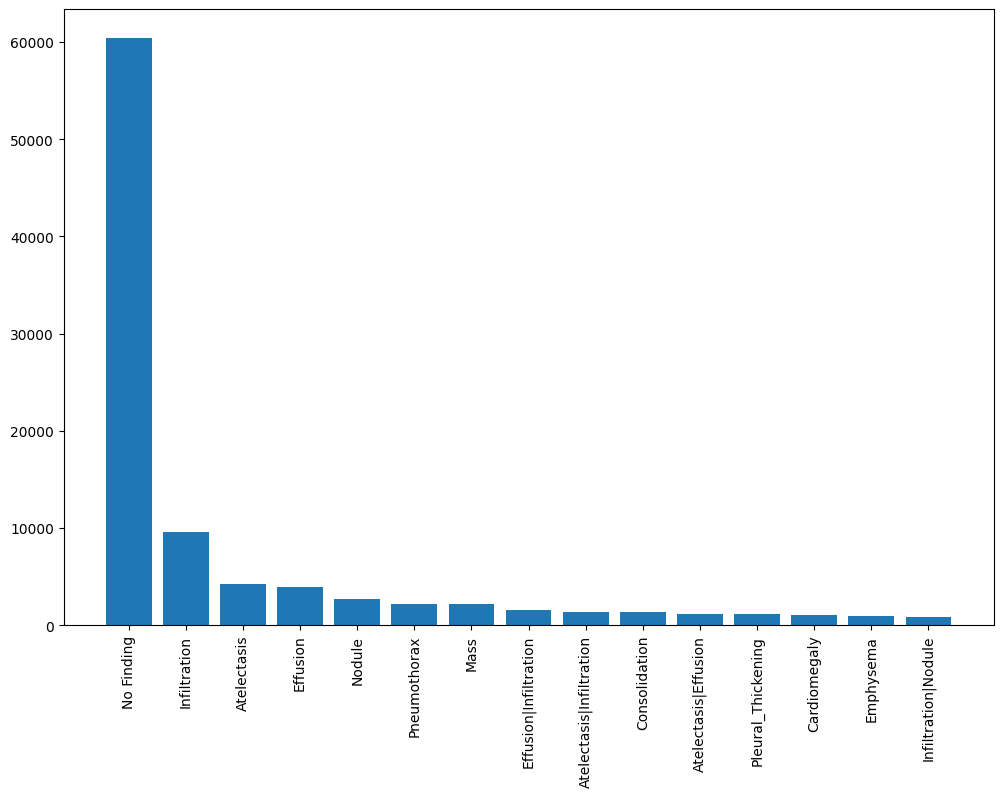

In [29]:
import numpy as np
import matplotlib.pyplot as plt
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)


In [30]:
from itertools import chain
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)
all_labels


All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [31]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)),
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])


Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


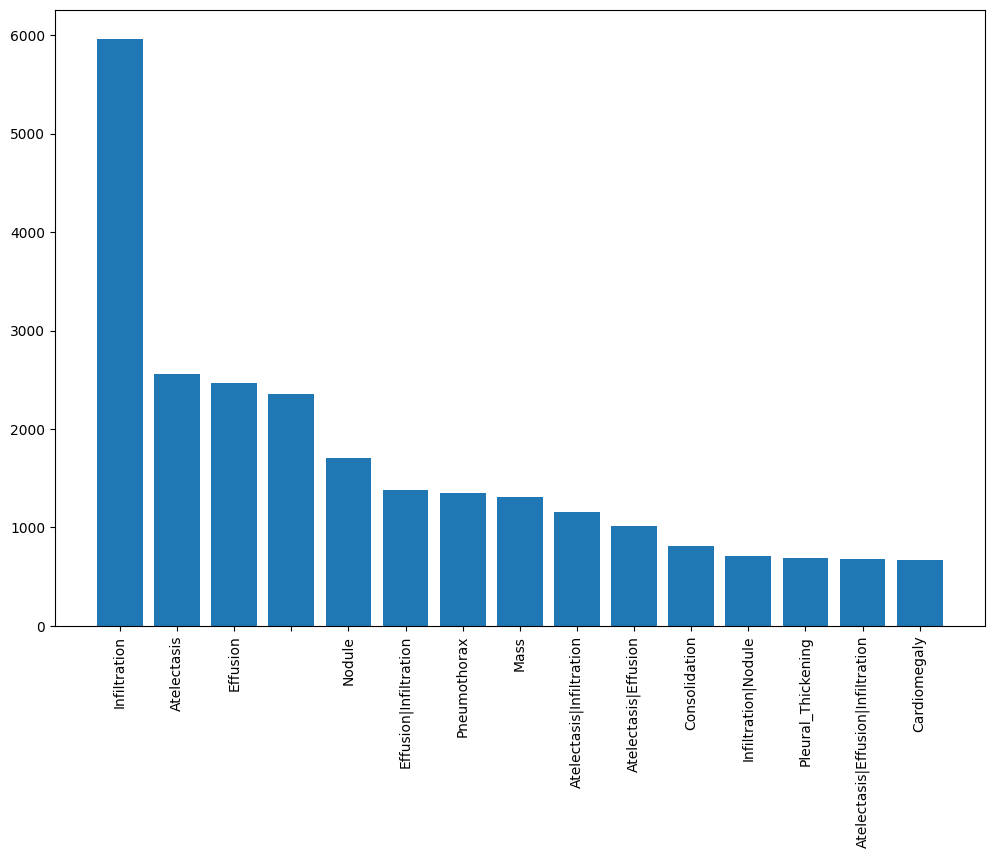

In [32]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)


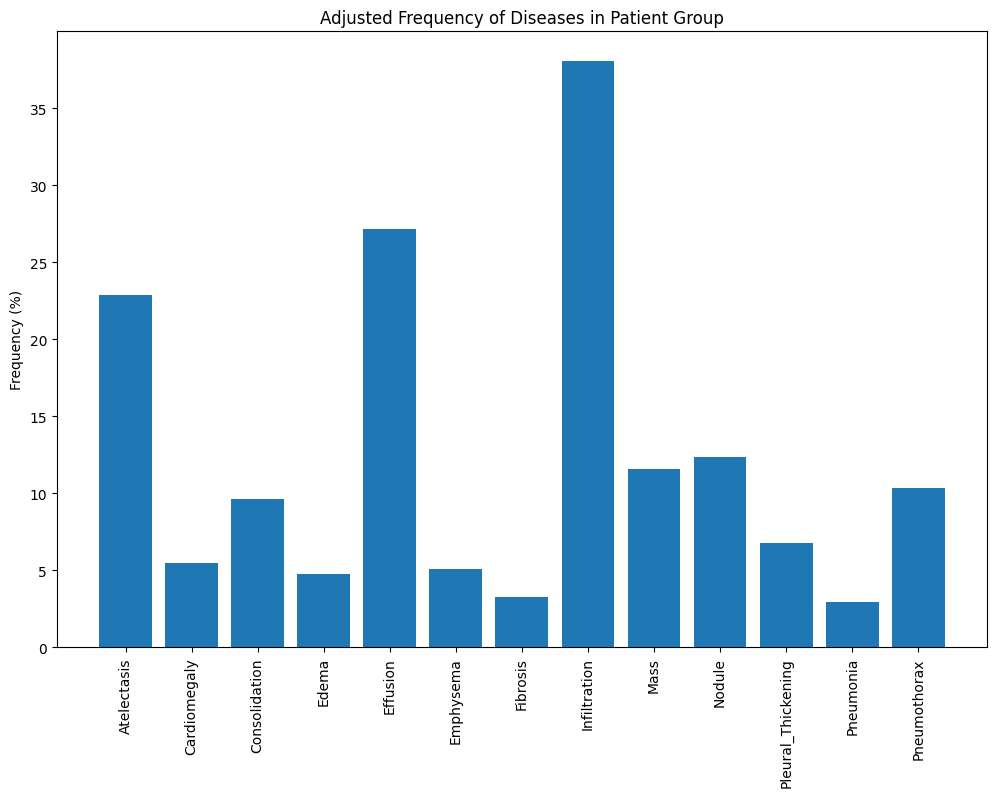

In [33]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')


In [34]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [35]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df,
                                   test_size = 0.25,
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])


train 30000 validation 10000


In [36]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.05,
                              width_shift_range=0.1,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)


In [38]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)
valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation
test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))


Found 28172 validated image filenames belonging to 13 classes.
Found 9397 validated image filenames belonging to 13 classes.
Found 9397 validated image filenames belonging to 13 classes.


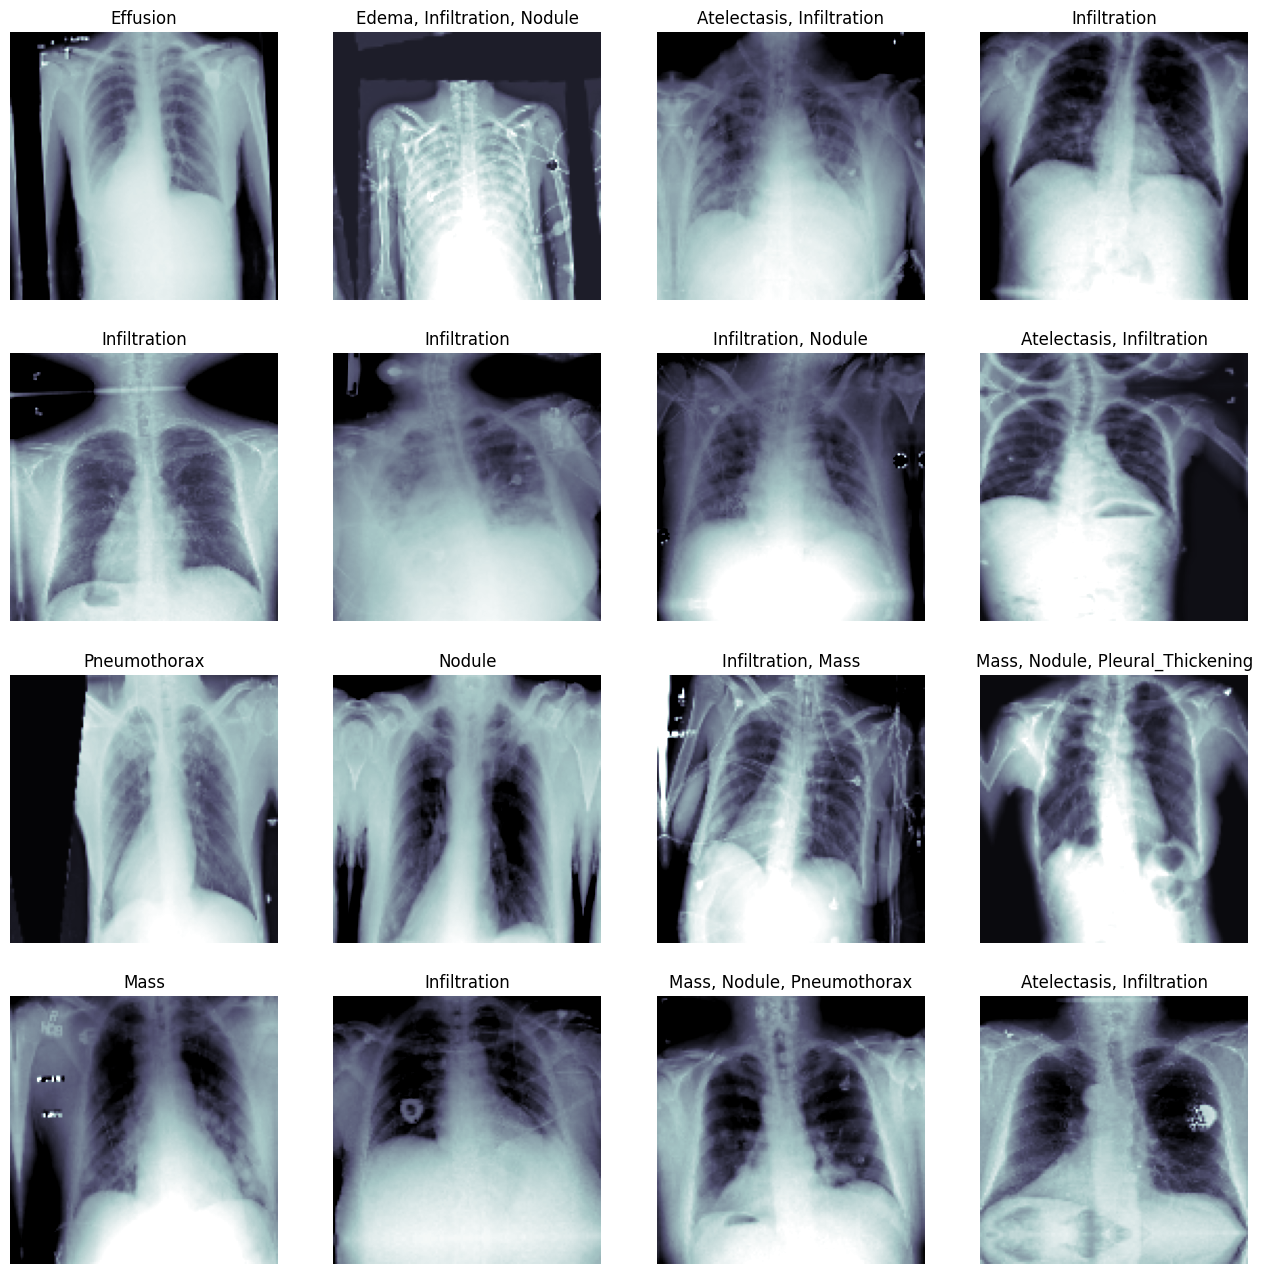

In [39]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y)
                             if n_score>0.5]))
    c_ax.axis('off')


In [40]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras import optimizers, callbacks, regularizers
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:],
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
multi_disease_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228288   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                6

In [41]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_best_.weights.h5".format('xray_class')
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=5)
callbacks_list = [checkpoint, early]


In [42]:
multi_disease_model.fit(train_gen,
                        steps_per_epoch=100,
                        validation_data = (test_X, test_Y),
                        epochs = 1,
                        callbacks = callbacks_list)


100/100 [==============================] - ETA: 0s - loss: 0.4554 - binary_accuracy: 0.8411 - mae: 0.2094
Epoch 1: val_loss improved from inf to 0.36732, saving model to xray_class_best_.weights.h5
100/100 [==============================] - 57s 529ms/step - loss: 0.4554 - binary_accuracy: 0.8411 - mae: 0.2094 - val_loss: 0.3673 - val_binary_accuracy: 0.8673 - val_mae: 0.2496


In [43]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y,0)):
    print('%s: %2.2f%%' % (c_label, s_count))


Atelectasis: 25.20%
Cardiomegaly: 4.59%
Consolidation: 9.38%
Edema: 4.88%
Effusion: 28.22%
Emphysema: 6.25%
Fibrosis: 4.20%
Infiltration: 41.80%
Mass: 12.01%
Nodule: 13.09%
Pleural_Thickening: 8.79%
Pneumonia: 3.03%
Pneumothorax: 11.13%


In [44]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)


32/32 [==============================] - 3s 89ms/step


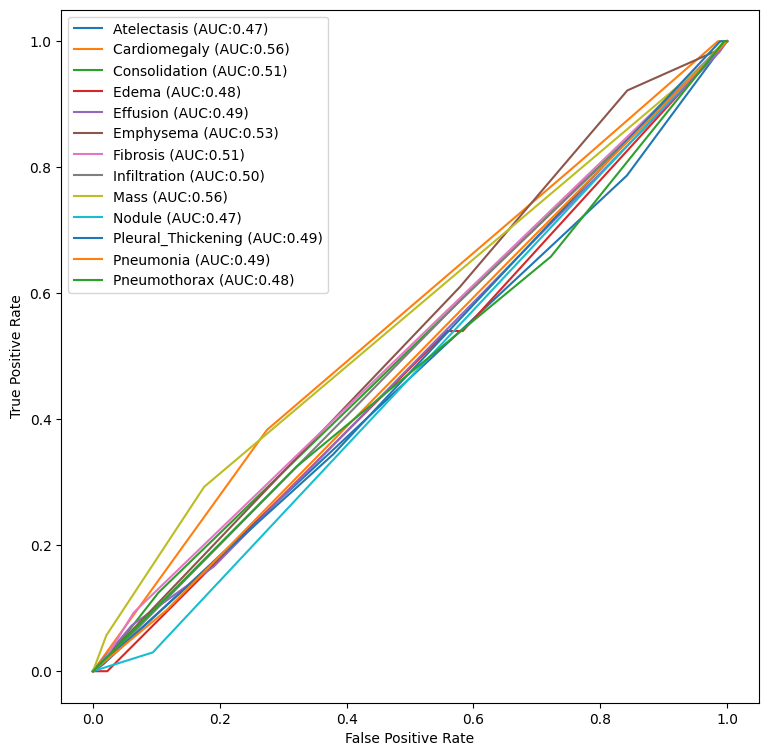

In [45]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')


In [46]:
import keras
sgd = keras.optimizers.SGD(learning_rate=0.1)
sgd_momentum = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
adagrad = keras.optimizers.Adagrad()
adadelta = keras.optimizers.Adadelta()
adam = keras.optimizers.Adam()
optimizers_list = [('sgd',sgd ),
                   ('sgd_momentum',sgd_momentum ),
                   ('adagrad',adagrad),
                   ('adadelta',adadelta),
                   ('adam', adam)
                  ]
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=7)
callbacks_list = [early]


('adam', <keras.src.optimizers.adam.Adam object at 0x00000288049C1A50>)


Epoch 1/50
881/881 [==============================] - 435s 489ms/step - loss: 0.3517 - binary_accuracy: 0.8652 - mae: 0.2046 - val_loss: 0.3605 - val_binary_accuracy: 0.8685 - val_mae: 0.1959
Epoch 2/50
881/881 [==============================] - 431s 489ms/step - loss: 0.3374 - binary_accuracy: 0.8688 - mae: 0.2006 - val_loss: 0.4754 - val_binary_accuracy: 0.8081 - val_mae: 0.2294
Epoch 3/50
881/881 [==============================] - 434s 493ms/step - loss: 0.3348 - binary_accuracy: 0.8689 - mae: 0.1994 - val_loss: 0.3452 - val_binary_accuracy: 0.8699 - val_mae: 0.1904
Epoch 4/50
881/881 [==============================] - 435s 493ms/step - loss: 0.3312 - binary_accuracy: 0.8701 - mae: 0.1974 - val_loss: 0.3355 - val_binary_accuracy: 0.8688 - val_mae: 0.1955
Epoch 5/50
881/881 [==============================] - 435s 493ms/step - loss: 0.3293 - binary_accuracy: 0.8708 - mae: 0.1961 - val_loss: 0.3363 - val_binary_accuracy: 0.8688 - val_mae: 0.2016
Epoch 6/50
881/881 [====================

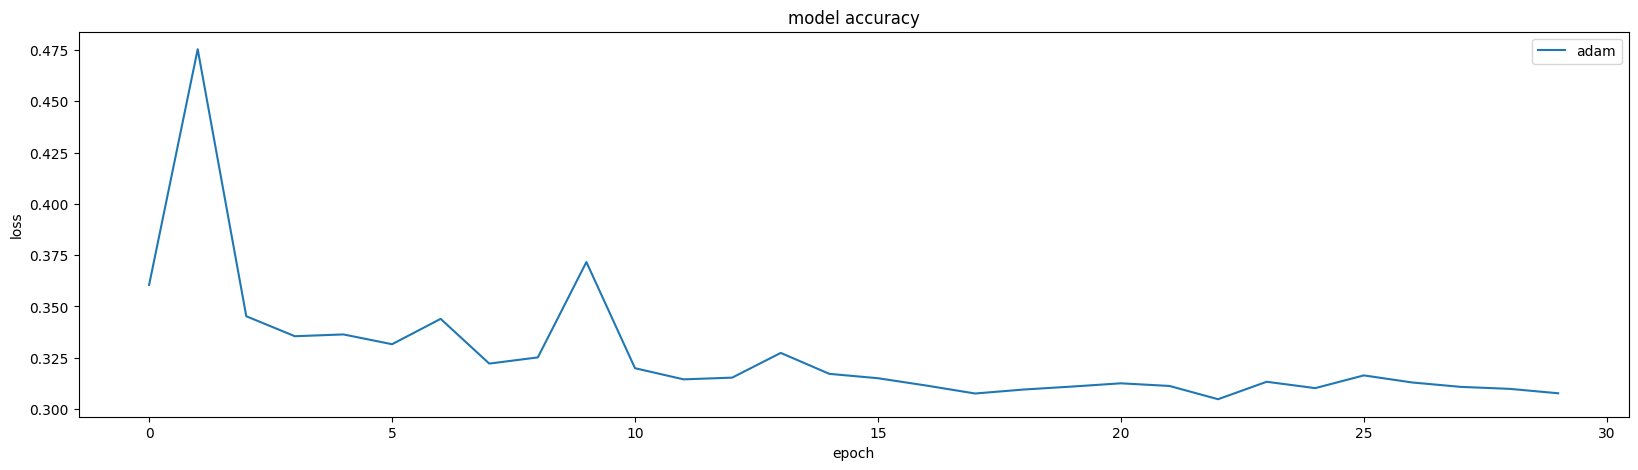

<Figure size 640x480 with 0 Axes>

In [47]:

plt.figure(figsize=(20,5))
for optimizer in optimizers_list:
    print(optimizer)
    multi_disease_model.compile(optimizer = optimizer[1], loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
    history = multi_disease_model.fit(train_gen,
                                  validation_data = (test_X, test_Y),
                                  epochs = 50,
                                  callbacks = callbacks_list)
    plt.plot(history.history['val_loss'])
plt.legend([x[0] for x in optimizers_list], loc='upper right')
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('optimizer_selection.png', bbox_inches='tight')


In [48]:
multi_disease_model.fit(train_gen,
                        steps_per_epoch = 100,
                        validation_data =  (test_X, test_Y),
                        epochs = 100,
                        callbacks = callbacks_list)


Epoch 1/100
100/100 [==============================] - 53s 526ms/step - loss: 0.2955 - binary_accuracy: 0.8812 - mae: 0.1768 - val_loss: 0.3075 - val_binary_accuracy: 0.8757 - val_mae: 0.1841
Epoch 2/100
100/100 [==============================] - 52s 515ms/step - loss: 0.2957 - binary_accuracy: 0.8809 - mae: 0.1774 - val_loss: 0.3115 - val_binary_accuracy: 0.8742 - val_mae: 0.1876
Epoch 3/100
100/100 [==============================] - 51s 510ms/step - loss: 0.2919 - binary_accuracy: 0.8825 - mae: 0.1747 - val_loss: 0.3079 - val_binary_accuracy: 0.8773 - val_mae: 0.1803
Epoch 4/100
100/100 [==============================] - 52s 514ms/step - loss: 0.2957 - binary_accuracy: 0.8809 - mae: 0.1773 - val_loss: 0.3087 - val_binary_accuracy: 0.8756 - val_mae: 0.1836
Epoch 5/100
100/100 [==============================] - 52s 515ms/step - loss: 0.2946 - binary_accuracy: 0.8816 - mae: 0.1762 - val_loss: 0.3117 - val_binary_accuracy: 0.8761 - val_mae: 0.1829
Epoch 6/100
100/100 [===================

In [49]:
# load the best weights
multi_disease_model.load_weights(weight_path)
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)


32/32 [==============================] - 3s 82ms/step


In [50]:
# look at how often the algorithm predicts certain diagnoses
for c_label, p_count, t_count in zip(all_labels,
                                     100*np.mean(pred_Y,0),
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))


Atelectasis: Dx: 25.20%, PDx: 38.50%
Cardiomegaly: Dx: 4.59%, PDx: 7.95%
Consolidation: Dx: 9.38%, PDx: 15.43%
Edema: Dx: 4.88%, PDx: 12.03%
Effusion: Dx: 28.22%, PDx: 46.34%
Emphysema: Dx: 6.25%, PDx: 12.68%
Fibrosis: Dx: 4.20%, PDx: 7.67%
Infiltration: Dx: 41.80%, PDx: 30.78%
Mass: Dx: 12.01%, PDx: 21.87%
Nodule: Dx: 13.09%, PDx: 21.48%
Pleural_Thickening: Dx: 8.79%, PDx: 10.69%
Pneumonia: Dx: 3.03%, PDx: 5.02%
Pneumothorax: Dx: 11.13%, PDx: 16.58%


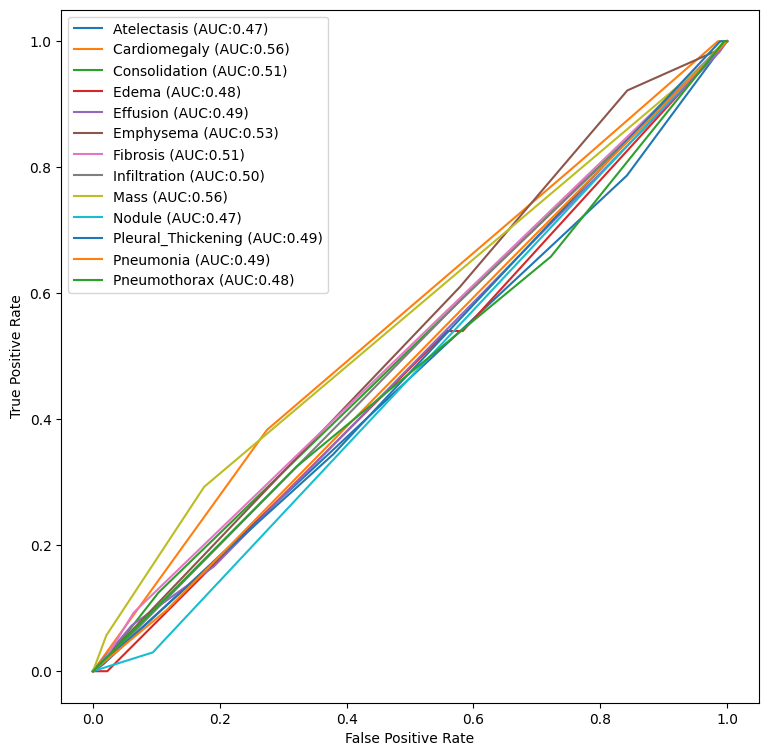

In [51]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')


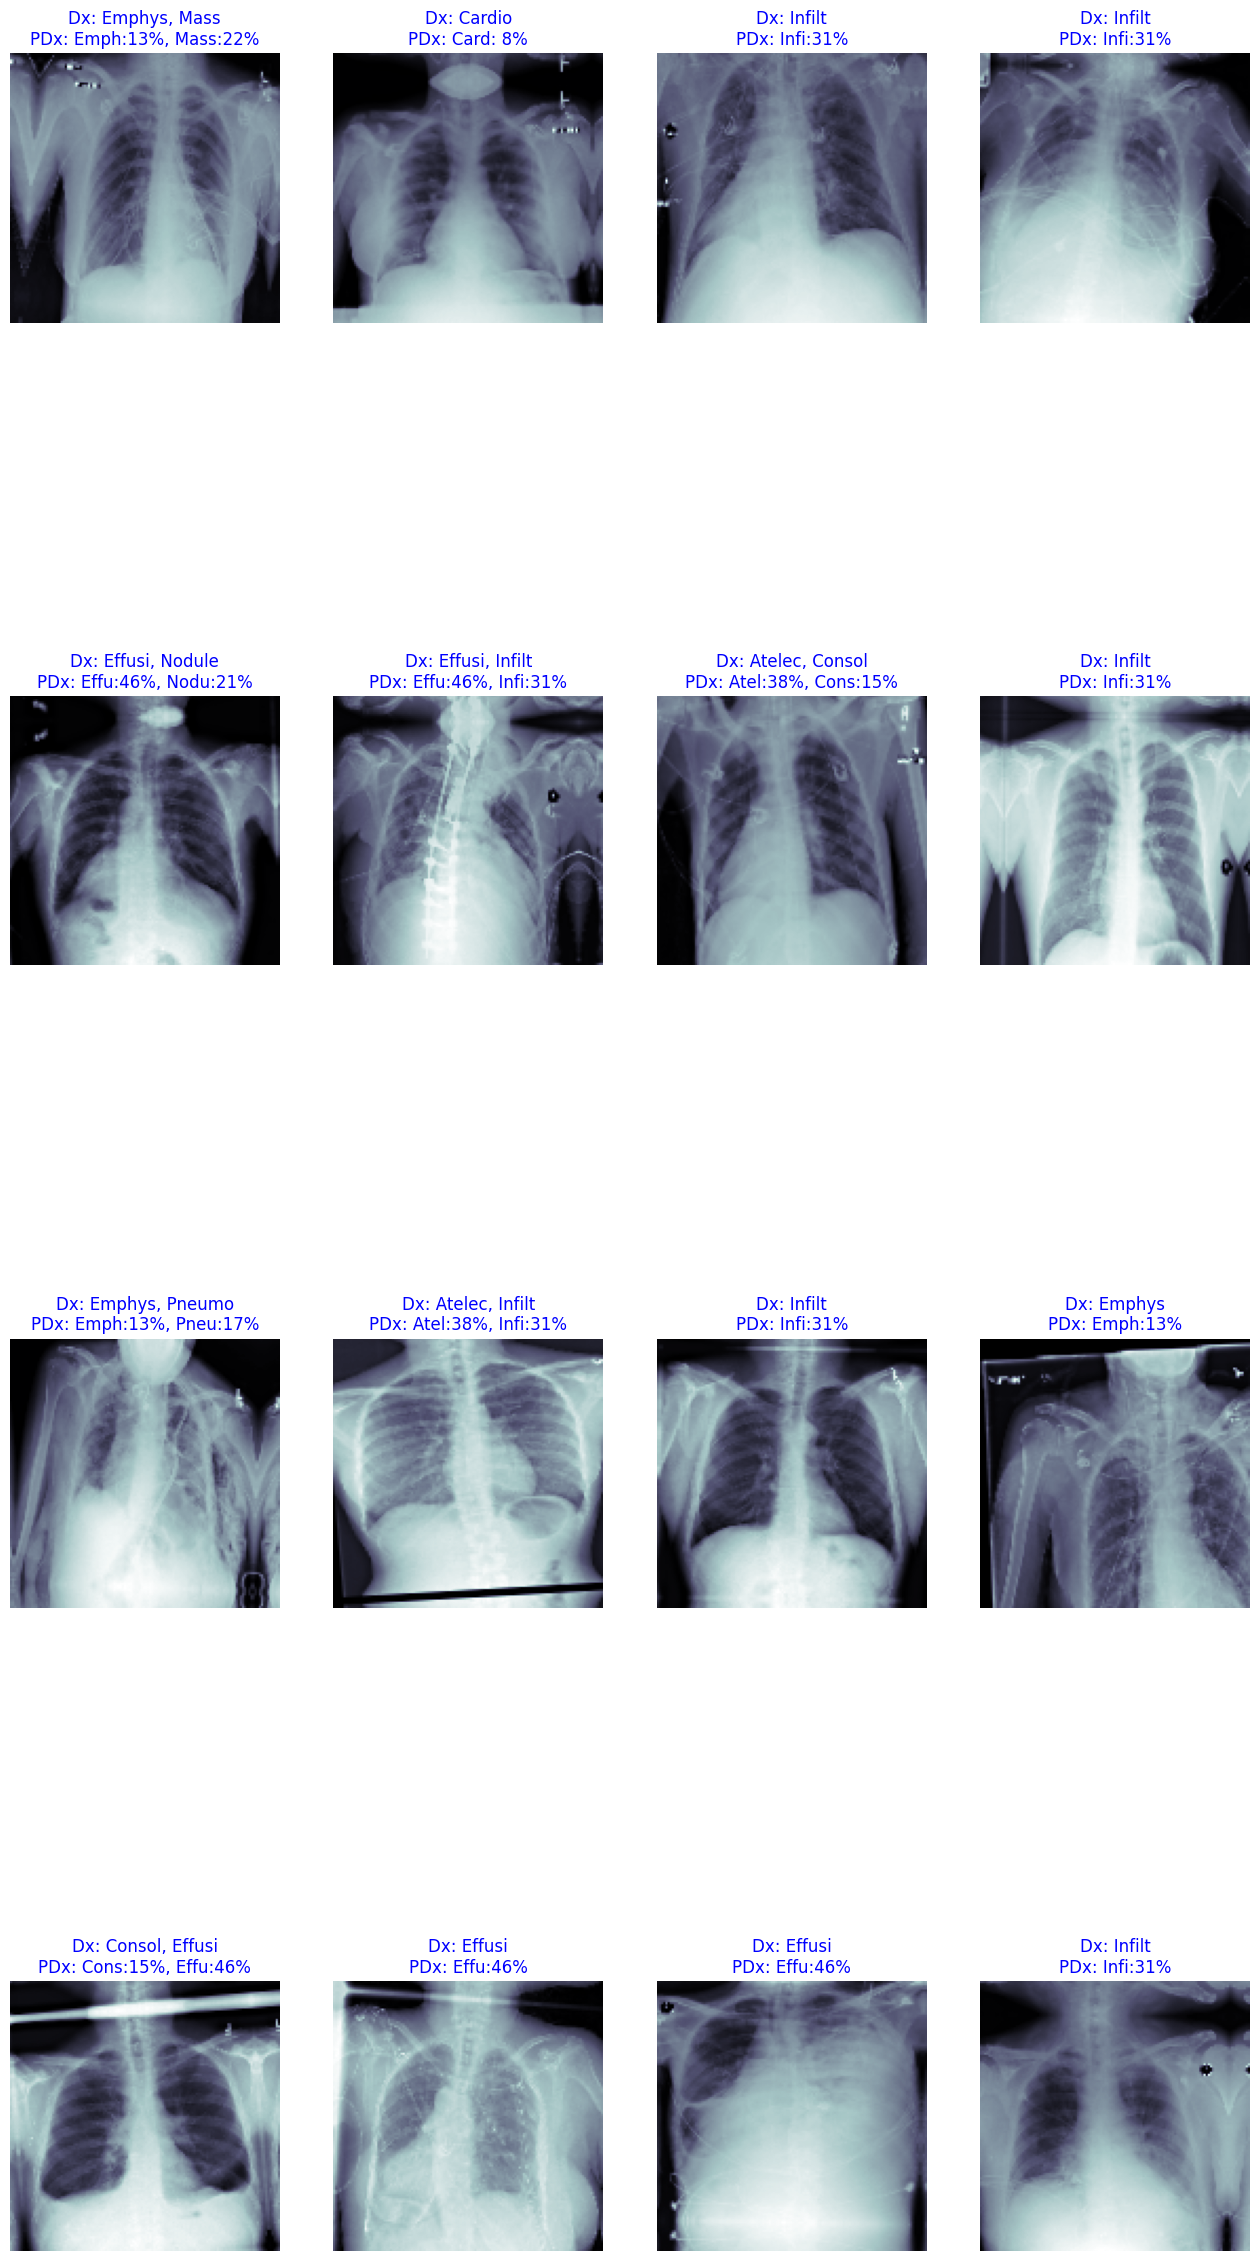

In [55]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels,
                                                                  test_Y[idx])
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels,
                                                                  test_Y[idx], pred_Y[idx])
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str), color='blue')
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')


In [53]:
multi_disease_model.save('latest_model2.h5')
print("Model saved with great success")

Model saved with great success


c:\Users\yanni\Desktop\Travail de Bachelor\mybachelorthesiswork\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

model = load_model('latest_model2.h5')

img1 = image.load_img('Example_images/Atelectasis/case1.jpeg', target_size=(128, 128), color_mode = 'grayscale')
img2 = image.load_img('Example_images/Atelectasis/case2.jpg', target_size=(128, 128), color_mode = 'grayscale')
img3 = image.load_img('Example_images/Atelectasis/case3.jpeg', target_size=(128, 128), color_mode = 'grayscale')
img4 = image.load_img('Example_images/Cardiomegaly/case1.jpg', target_size=(128, 128), color_mode = 'grayscale')
img5 = image.load_img('Example_images/Cardiomegaly/case2.png', target_size=(128, 128), color_mode = 'grayscale')


# Convert the image to a numpy array
img_array = image.img_to_array(img4)

# Expand dimensions to fit the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image
img_array = img_array / 255.0

# Make the prediction
prediction = model.predict(img_array)

print(prediction)

1/1 [==============================] - 0s 269ms/step
[[0.38498127 0.07948712 0.15428677 0.1202732  0.46342775 0.12675999
  0.07668895 0.30781013 0.2187039  0.21481541 0.10692091 0.05016043
  0.16584772]]


In [ ]:
[[0.38498127 0.07948712 0.15428674 0.12027319 0.46342775 0.12676004
  0.07668895 0.3078101  0.2187039  0.21481541 0.10692091 0.05016043
  0.16584773]]